# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [121]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 6: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [122]:
# Cell type : CodeWrite
def likelihood(data_points, mu, sigma):
    sigma_inverse = np.linalg.inv(sigma)
    det_sigma = np.linalg.det(sigma)
    mu_ = np.subtract(data_points, mu)
    
    likelihood = (1.0/np.sqrt(det_sigma)*((np.sqrt(2*314)))*np.exp(-0.5*np.dot(np.dot(mu_,sigma_inverse),mu_)))
    return likelihood

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_train_positive = []
    x_train_negative = []
    Y_test_predict = []

    for (x,y) in zip(X_train, Y_train):
        if y == 1:
            x_train_positive.append(x) # Total Count of Positive Labels
        else:
            x_train_negative.append(x) # Total Count of Negative Labels
    
    mu_plus = np.mean(x_train_positive, axis = 0)
    mu_minus = np.mean(x_train_negative, axis = 0)

    prior_plus_one = 1.0 * len(x_train_positive)/ 1.0 * len(X_train)  # Probabilty of y = 1
    prior_minus_one = 1.0 * len(x_train_negative)/ 1.0 *len(X_train)

    sigma = np.identity(len(X_train[0]))

    for sample in X_test:
        posterior_plus_one = likelihood(sample, mu_plus, sigma) * prior_plus_one
        posterior_minus_one = likelihood(sample, mu_minus, sigma) * prior_minus_one

        if posterior_plus_one >= posterior_minus_one:
            Y_test_predict.append(1)
        else:
            Y_test_predict.append(-1)
    return Y_test_predict
        


    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_train_positive = []
    x_train_negative = []
    Y_test_predict = []

    for (x,y) in zip(X_train, Y_train):
        if y == 1:
            x_train_positive.append(x)
        else:
            x_train_negative.append(x)

    mu_plus = np.mean(x_train_positive, axis = 0)
    mu_minus = np.mean(x_train_negative, axis = 0)

    prior_plus_one = 1.0 * len(x_train_positive)/(1.0 * len(X_train))
    prior_minus_one = 1.0 * len(x_train_negative)/ (1.0 * len(X_train))

    sigma = np.cov(X_train.T)

    for sample in np.array(X_test):
        posterior_plus_one = likelihood(sample, mu_plus, sigma) * prior_plus_one
        posterior_minus_one = likelihood(sample, mu_minus, sigma) * prior_minus_one

        if posterior_plus_one >= posterior_minus_one :
            Y_test_predict.append(-1)
        else:
            Y_test_predict.append(-1)
    return Y_test_predict
            

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    x_train_positive = []
    x_train_negative = []
    Y_test_predict = []

    for (x,y) in zip(X_train, Y_train):
        if y == 1:
            x_train_positive.append(x)
        else:
            x_train_negative.append(x)
    
    mu_plus = np.mean(x_train_positive, axis = 0)
    mu_minus = np.mean(x_train_negative, axis = 0)

    prior_plus_one = 1.0 * len(x_train_positive)/ (1.0 * len(X_train))
    prior_minus_one = 1.0 * len(x_train_negative) / (1.0 * len(X_train))

    sigma_plus = np.cov(np.array(x_train_positive).T)
    sigma_minus = np.cov(np.array(x_train_negative).T)

    for sample in np.array(X_test):
        posterior_plus_one = likelihood(sample, mu_plus, sigma_plus) * prior_plus_one
        posterior_minus_one = likelihood(sample, mu_minus, sigma_minus) * prior_minus_one

        if posterior_plus_one >= posterior_minus_one:
            Y_test_predict.append(1)
        else:
            Y_test_predict.append(-1)
    return Y_test_predict   
    




In [123]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 6

#### 6a) Run the above three algorithms (BayesA,B and C), for the three datasets given (datasetA.npz, datasetB.npz, datasetC.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.





<ipython-input-82-fb83a37416e7>:135: RuntimeWarning: overflow encountered in exp
  Eta = 1.0/(1+(1-a)/a*np.sqrt(np.linalg.det(cov_plus))/np.sqrt(np.linalg.det(cov_minus))*np.exp(-0.5*(term1-term2)))


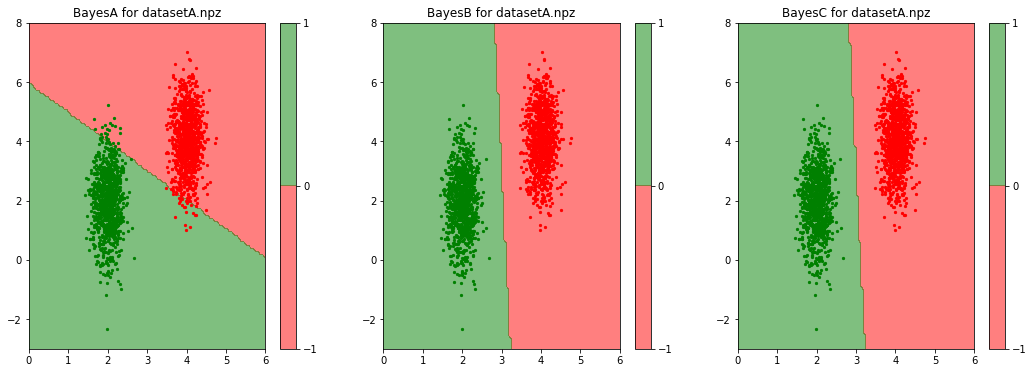

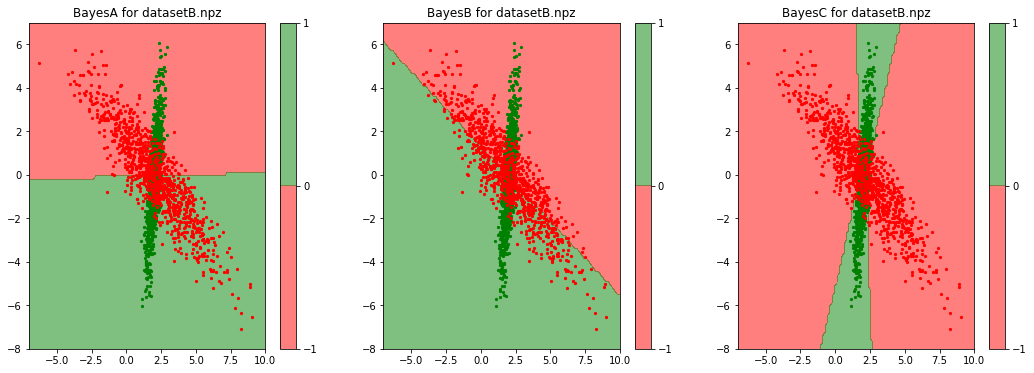

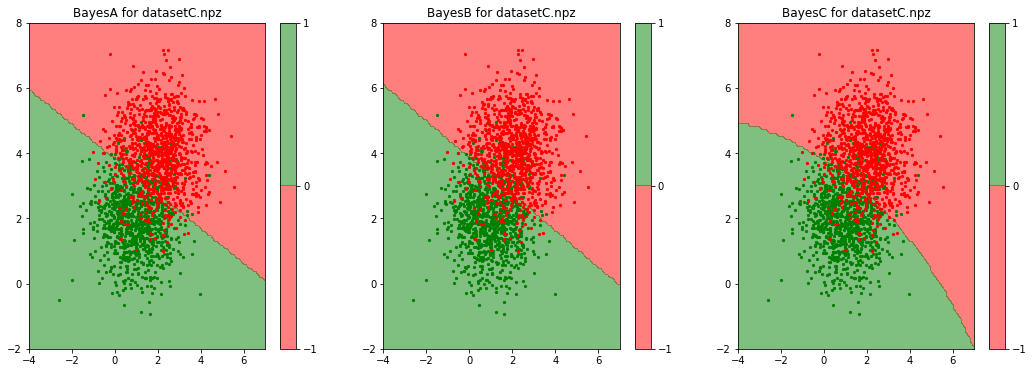

In [124]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# Cell type : CodeWrite

data_names = ['datasetA.npz','datasetB.npz','datasetC.npz']
#d_s_1=np.load('dataset1_1.npz')
#d_s_2=np.load('dataset1_2.npz')
#d_s_3=np.load('dataset1_3.npz')
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train = d_s_2['arr_0']
    Y_train = d_s_2['arr_1']
    X_test  = d_s_2['arr_2']
    Y_test  = d_s_2['arr_3']
    
    X_train_plus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    # splitting the train set according to Y values
    #for i in range(0,len(Y_train)):
    #    if(Y_train[i]==-1):
    #        X_train_minus.append(X_train[i])
    #    else :
    #        X_train_plus.append(X_train[i])
    
    #print(X_train_plus)
    # limits for plotting
    max_0   = round(np.max(X_train[:,0]))+1
    min_0   = round(np.min(X_train[:,0]))-1
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train[:,1]))+1
    min_1   = round(np.min(X_train[:,1]))-1
    lim_1  = np.linspace(min_1,max_1,100)
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)

    Y_test_gr_a = np.zeros(X_test_1.shape)
    Y_test_gr_b = np.zeros(X_test_1.shape)
    Y_test_gr_c = np.zeros(X_test_1.shape)


    for i in range(Y_test_gr_a.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        Y_test_gr_a[i,:] = function_for_A(X_train,Y_train,X_test_gr)
        Y_test_gr_b[i,:] = function_for_B(X_train,Y_train,X_test_gr)
        Y_test_gr_c[i,:] = function_for_C(X_train,Y_train,X_test_gr)

        # print(X_test_gr)
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_a,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('BayesA '+'for '+ str(data_set))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d)
    
    plt.subplot(1,3,2)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_b,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('BayesB '+'for '+ str(data_set))
    plt.colorbar(d)
    
    plt.subplot(1,3,3)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_c,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('BayesC '+'for '+ str(data_set))
    plt.colorbar(d)



####6b) Give the ROC Curves for all the classifiers.




<ipython-input-125-869029482eee>:137: RuntimeWarning: overflow encountered in exp
  Eta = 1.0/(1+(1-a)/a*np.sqrt(np.linalg.det(cov_plus))/np.sqrt(np.linalg.det(cov_minus))*np.exp(-0.5*(term1-term2)))


Text(0, 0.5, 'True Positive Rate')

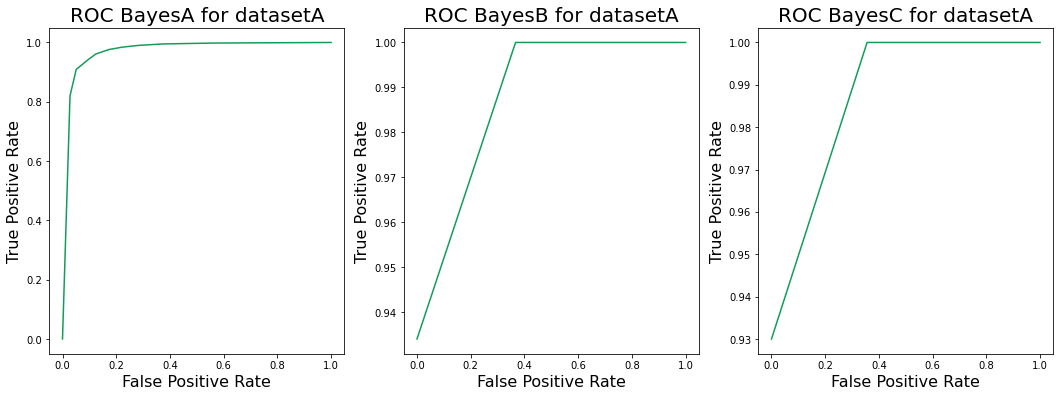

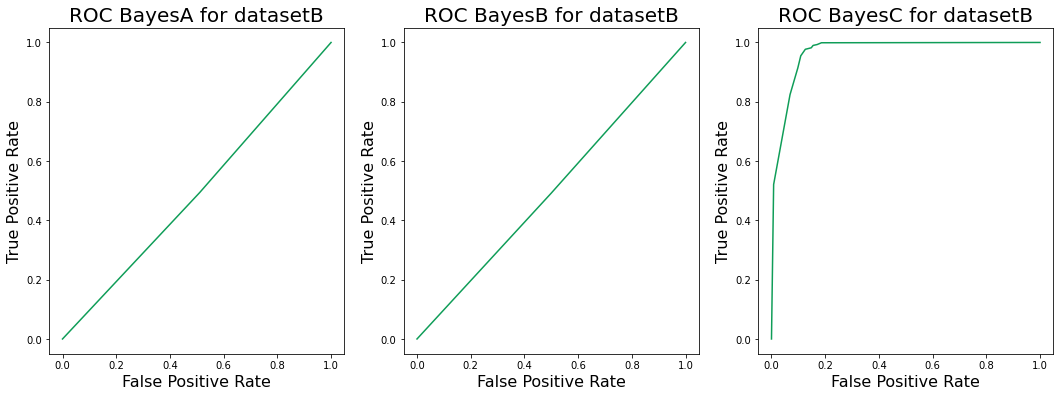

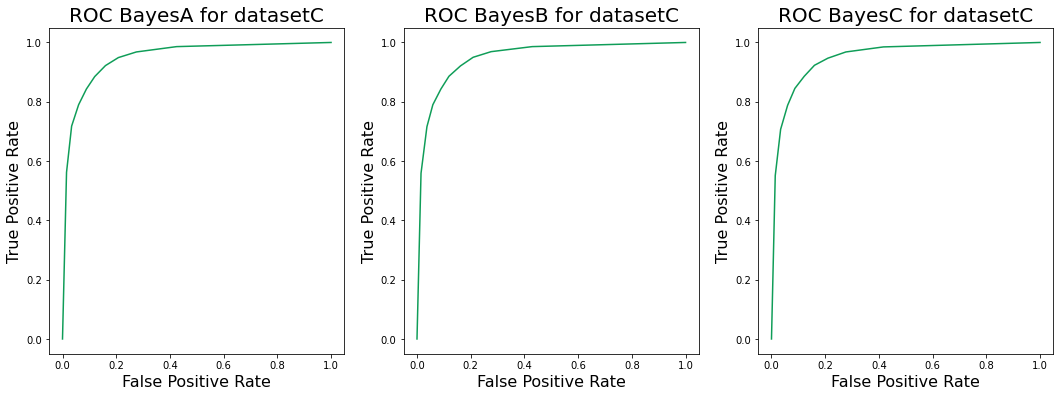

In [125]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# Cell type : CodeWrite

def function_for_A_(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    for j in range(0,len(X_test)):
        term1 = np.linalg.norm(X_test[j]-mu_plus)
        term2 = np.linalg.norm(X_test[j]-mu_minus)
        #print(term1,term2)
        Eta = a*np.exp(-0.5*term1**2)/(a*np.exp(-0.5*term1**2)+(1-a)*np.exp(-0.5*term2**2))
        #print(Eta)
        Y_test_pred[j]= Eta
    
    return(Y_test_pred)
    
    
    
    
    
def function_for_B_(X_train, Y_train, X_test):
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    cov_minus = np.cov(X_train_minus,rowvar = False,bias = True)
    cov_plus = np.cov(X_train_plus,rowvar = False ,bias = True)
    #finding the ML Estimate of covariance
    cov = (len(X_train_minus)*cov_minus + len(X_train_plus)*cov_plus)/len(X_train)
    #print(cov)
    
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    
    for j in range(0,len(X_test)):
        term1 = np.dot(np.dot(np.transpose(X_test[j]-mu_minus),np.linalg.inv(cov)),X_test[j]-mu_minus)
        term2 = np.dot(np.dot(np.transpose(X_test[j]-mu_plus),np.linalg.inv(cov)),X_test[j]-mu_plus)

        Eta = 1.0/(1+(1-a)/a*np.exp(-0.5*(term1-term2)))
        #print(Eta)
        Y_test_pred[j]= Eta
    
    return(Y_test_pred)



def function_for_C_(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    
    #finding the covariance
    cov_minus = np.cov(X_train_minus,rowvar = False,bias = True)
    #print(cov_minus)
    cov_plus = np.cov(X_train_plus,rowvar = False ,bias = True)
    #print(cov_plus)
    
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    # dividing by determinants is remaining
    for j in range(0,len(X_test)):
        term1 = np.dot(np.dot(np.transpose(X_test[j]-mu_minus),np.linalg.inv(cov_minus)),X_test[j]-mu_minus)
        term2 = np.dot(np.dot(np.transpose(X_test[j]-mu_plus),np.linalg.inv(cov_plus)),X_test[j]-mu_plus)

        Eta = 1.0/(1+(1-a)/a*np.sqrt(np.linalg.det(cov_plus))/np.sqrt(np.linalg.det(cov_minus))*np.exp(-0.5*(term1-term2)))
        #print(Eta)
        Y_test_pred[j]= Eta
    
    return(Y_test_pred)

dataset_1 = np.load("datasetA.npz")
X_train_1 = dataset_1['arr_0']
Y_train_1 = dataset_1['arr_1']
X_test_1 = dataset_1['arr_2']
Y_test_1 = dataset_1['arr_3']

dataset_2 = np.load("datasetB.npz")
X_train_2 = dataset_2['arr_0']
Y_train_2 = dataset_2['arr_1']
X_test_2 = dataset_2['arr_2']
Y_test_2 = dataset_2['arr_3']

dataset_3 = np.load("datasetC.npz")
X_train_3 = dataset_3['arr_0']
Y_train_3 = dataset_3['arr_1']
X_test_3 = dataset_3['arr_2']
Y_test_3 = dataset_3['arr_3']

y_pred_1_a_ = function_for_A_(X_train_1,Y_train_1,X_test_1)
y_pred_1_b_ = function_for_B_(X_train_1,Y_train_1,X_test_1)
y_pred_1_c_ = function_for_C_(X_train_1,Y_train_1,X_test_1)

y_pred_2_a_ = function_for_A_(X_train_2,Y_train_2,X_test_2)
y_pred_2_b_ = function_for_B_(X_train_2,Y_train_2,X_test_2)
y_pred_2_c_ = function_for_C_(X_train_2,Y_train_2,X_test_2)

y_pred_3_a_ = function_for_A_(X_train_3,Y_train_3,X_test_3)
y_pred_3_b_ = function_for_B_(X_train_3,Y_train_3,X_test_3)
y_pred_3_c_ = function_for_C_(X_train_3,Y_train_3,X_test_3)

def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, -1)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, -1)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

#plotting for dataset 1

plt.figure(figsize=(18,6))
plt.subplot(131)
ROC = roc_from_scratch(np.array(y_pred_1_a_), Y_test_1, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesA for datasetA',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(132)
ROC = roc_from_scratch(np.array(y_pred_1_b_), Y_test_1, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesB for datasetA',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(133)
ROC = roc_from_scratch(np.array(y_pred_1_c_), Y_test_1, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesC for datasetA',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

#plotting for dataset 2

plt.figure(figsize=(18,6))
plt.subplot(131)
ROC = roc_from_scratch(np.array(y_pred_2_a_), Y_test_2, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesA for datasetB',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(132)
ROC = roc_from_scratch(np.array(y_pred_2_b_), Y_test_2, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesB for datasetB',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(133)
ROC = roc_from_scratch(np.array(y_pred_2_c_), Y_test_2, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesC for datasetB',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

#plotting for dataset 3

plt.figure(figsize=(18,6))
plt.subplot(131)
ROC = roc_from_scratch(np.array(y_pred_3_a_), Y_test_3, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesA for datasetC',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(132)
ROC = roc_from_scratch(np.array(y_pred_3_b_), Y_test_3, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesB for datasetC',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

plt.subplot(133)
ROC = roc_from_scratch(np.array(y_pred_3_c_), Y_test_3, partitions=10)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58')
plt.title('ROC BayesC for datasetC',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

####6c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)

    
                   datasetA	  datasetB	  datasetC
    ClassifierA	0.0980	    0.5085	    0.1175

    ClassifierB	0.2290	    0.5040	    0.1165

    ClassifierC	0.2255	    0.0745	    0.1180


####6d) In the next Textwrite cell, summarise your observations regarding the nine learnt classifiers.
            

**Cell type : TextWrite**
(Write your observations and table of errors here)

-> On datasetA, function_for_A has performed exceptionally well, since the function neglects the Covariance distribution of the train dataset, this could be the case since train and test datset distributions are different
-> On datasetB, function_for_C is better at identifying the underlying distribution, since its takes into consideration both sigma_p and sigma_n
-> On dataset_C, all classifier has minimal error rate
-> Overall ClassifierC performs well when the train and test distributions are similar
-> Overall ClassifierA performs well when the train and test distributions are different

-> Yes, non-parametric approach can be used for classification
->K-nearest-neighbour density estimation technique to each class separately and then make use of Bayes’ theorem. Let us suppose that we have a data set comprising Nk points in class Ck with N points in total, so that k Nk = N. If we wish to classify a new point x, we draw a sphere centred on x containing precisely K points irrespective of their class. Suppose this sphere has volume V and contains Kk points from class Ck. Then provides an estimate of the density associated with each class
p(x|Ck) = Kk/NkV
p(x) = K/NV
p(Ck) = Nk/N
p(Ck|x) = p(x|Ck)p(Ck)/p(x) = Kk/K

->Pros : 
    ->the assumed density for MLE based approach might be a poor model of the distribution that generates the data, which can
      result in poor predictive performance. For instance, if the process that generates the data is multimodal, then this           aspect of the distribution can never be captured by a Gaussian, which is necessarily unimodal.

->Cons : 
    -> non-parametric methods are limited to small datasets